<a href="https://colab.research.google.com/github/Letch49/ML_vvsu_2024/blob/master/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import Outliers

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [2]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [3]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
"""

'\nПредварительно - оптимизируйте ваш набор данных.\n1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)\n2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)\n3. Скопируйте df в df_cluster # df_cluster = df.copy()\nдалее вы работаете с ним\n4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler\n5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html\n'

In [4]:
# your_code here

In [5]:
df_clear = df

# Чистим от NaN
df_clear = df_clear.dropna()
df_clear = df_clear.reset_index(drop=True)

df_clear_clss = Outliers.Outline(df_clear)

# Чистим от выбросов
df_outliers_drop = df_clear_clss.filter_outliers_by_median('RestingBP')
df_outliers_clear = df_clear.drop(index=df_outliers_drop)
df_outliers_clear = df_outliers_clear.reset_index(drop=True)
df_outliers_clear

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
871,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
872,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
873,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
874,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [6]:
df_outliers_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             876 non-null    int64  
 1   Sex             876 non-null    object 
 2   ChestPainType   876 non-null    object 
 3   RestingBP       876 non-null    int64  
 4   Cholesterol     876 non-null    int64  
 5   FastingBS       876 non-null    int64  
 6   RestingECG      876 non-null    object 
 7   MaxHR           876 non-null    int64  
 8   ExerciseAngina  876 non-null    object 
 9   Oldpeak         876 non-null    float64
 10  ST_Slope        876 non-null    object 
 11  HeartDisease    876 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 82.3+ KB


In [7]:
df_cluster = df_outliers_clear.copy()
#df_cluster


# Нужно, чтобы не плодить лишние переменные
df_cluster = df_cluster.astype({'Age': 'float64',
                                'RestingBP': 'float64',
                                'Cholesterol': 'float64',
                                'FastingBS': 'float64',
                                'MaxHR': 'float64',
                                'HeartDisease': 'float64'
                                })

num_features_float = df_cluster.select_dtypes(include=['float64']).columns
cat_features_obj = df_cluster.select_dtypes(include=['object']).columns

scaler_std = StandardScaler()
df_cluster[num_features_float] = scaler_std.fit_transform(df_cluster[num_features_float])

label_enocore = LabelEncoder()
#df_cluster[cat_features_obj] = label_enocore.fit_transform(df_cluster[cat_features_obj])

for i in df_cluster[cat_features_obj]:
    df_cluster[i] = label_enocore.fit_transform(df_cluster[i])

df_cluster



#df_cluster.info()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.409049,1,1,0.626847,0.831538,-0.545690,1,1.377493,0,-0.824441,2,-1.09843
1,-0.458104,0,2,1.945415,-0.171590,-0.545690,1,0.746568,0,0.123590,1,0.91039
2,-1.726031,1,1,-0.032437,0.776320,-0.545690,2,-1.540536,0,-0.824441,2,-1.09843
3,-0.563765,0,0,0.494990,0.141312,-0.545690,1,-1.146208,1,0.597606,1,0.91039
4,0.070199,1,2,1.286131,-0.033545,-0.545690,1,-0.594148,0,-0.824441,2,-1.09843
...,...,...,...,...,...,...,...,...,...,...,...,...
871,-0.880746,1,3,-1.351005,0.601463,-0.545690,1,-0.199820,0,0.313197,1,0.91039
872,1.549448,1,0,0.890560,-0.051951,1.832542,1,0.155075,0,2.398866,1,0.91039
873,0.387181,1,0,-0.032437,-0.622537,-0.545690,1,-0.870178,1,0.313197,1,0.91039
874,0.387181,0,1,-0.032437,0.343779,-0.545690,0,1.456359,0,-0.824441,1,0.91039


In [8]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

'\nЗдесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.\n'

In [9]:
# your_code here

In [67]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_cluster[['Age', 'RestingBP']])
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_


kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(df_cluster[['Age', 'RestingBP']])
cluster_centers2 = kmeans2.cluster_centers_
cluster_labels2 = kmeans2.labels_


kmeans3 = KMeans(n_clusters=6)
kmeans3.fit(df_cluster[['Age', 'RestingBP']])
cluster_centers3 = kmeans3.cluster_centers_
cluster_labels3 = kmeans3.labels_

/home/kiwi_kam/Документы/С флешки/3 курс 2023/Машинное обучение/.machine_learn/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kiwi_kam/Документы/С флешки/3 курс 2023/Машинное обучение/.machine_learn/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kiwi_kam/Документы/С флешки/3 курс 2023/Машинное обучение/.machine_learn/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_in

In [68]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров k-means\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

In [12]:
# your_code here

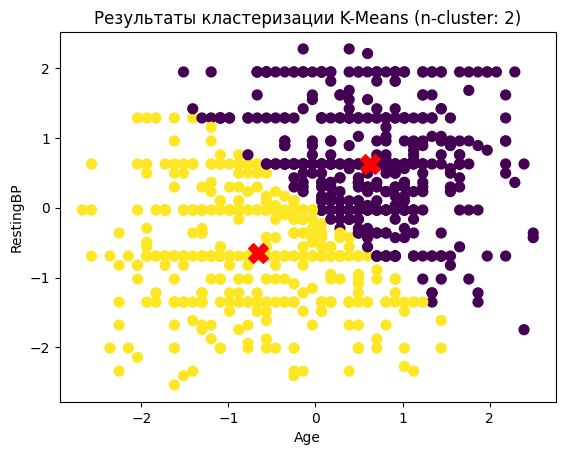

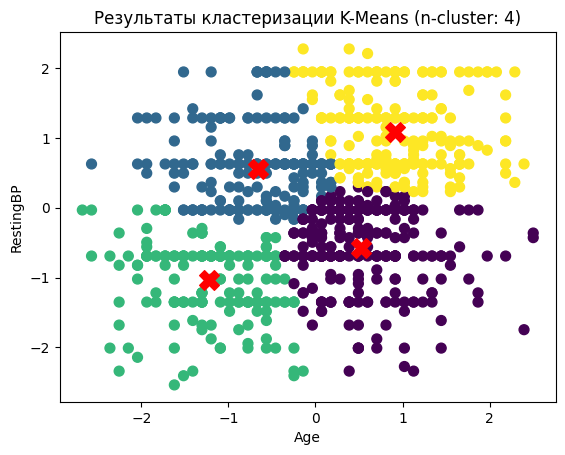

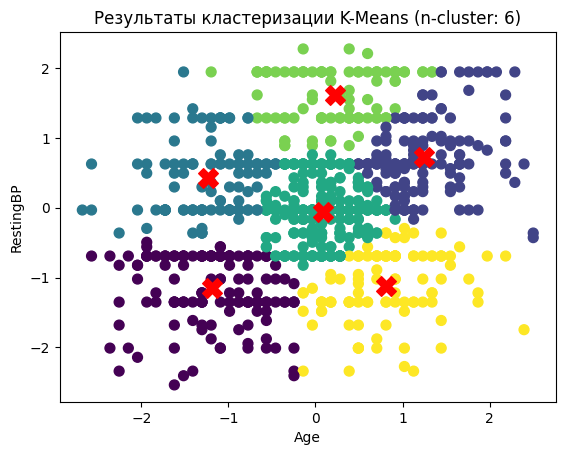

In [89]:
# n_cluster

out_cluster = plt

out_cluster.scatter(df_cluster['Age'], df_cluster['RestingBP'], c=cluster_labels, s=50, cmap='viridis')
out_cluster.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
out_cluster.xlabel('Age')
out_cluster.ylabel('RestingBP')
out_cluster.title('Результаты кластеризации K-Means (n-cluster: 2)')
out_cluster.show()


# n_cluster2

out_cluster2 = plt

out_cluster2.scatter(df_cluster['Age'], df_cluster['RestingBP'], c=cluster_labels2, s=50, cmap='viridis')
out_cluster2.scatter(cluster_centers2[:, 0], cluster_centers2[:, 1], c='red', s=200, marker='X')
out_cluster2.xlabel('Age')
out_cluster2.ylabel('RestingBP')
out_cluster2.title('Результаты кластеризации K-Means (n-cluster: 4)')
out_cluster2.show()


# n_cluster3

out_cluster3 = plt

out_cluster3.scatter(df_cluster['Age'], df_cluster['RestingBP'], c=cluster_labels3, s=50, cmap='viridis')
out_cluster3.scatter(cluster_centers3[:, 0], cluster_centers3[:, 1], c='red', s=200, marker='X')
out_cluster3.xlabel('Age')
out_cluster3.ylabel('RestingBP')
out_cluster3.title('Результаты кластеризации K-Means (n-cluster: 6)')
out_cluster3.show()

In [13]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

'\nЗдесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?\n'

In [14]:
# your_code here

In [83]:
x_scaler = StandardScaler().fit_transform(df_cluster[['Age', 'RestingBP']])

dbscan = DBSCAN(eps=.2, min_samples=5)
dbscan.fit(x_scaler)
labels = dbscan.labels_


dbscan2 = DBSCAN(eps=.4, min_samples=5)
dbscan2.fit(x_scaler)
labels2 = dbscan2.labels_


dbscan3 = DBSCAN(eps=.6, min_samples=5)
dbscan3.fit(x_scaler)
labels3 = dbscan3.labels_

In [15]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров DBSCAN\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

In [16]:
# your_code here

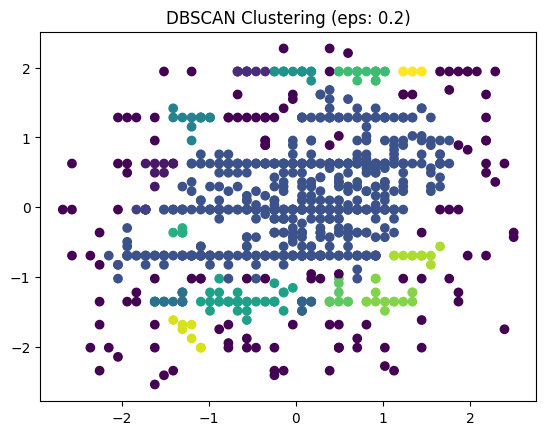

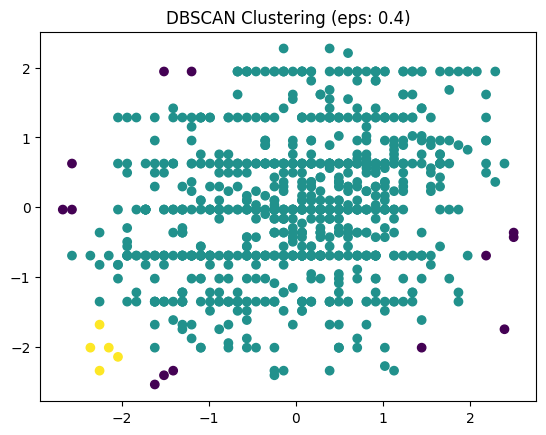

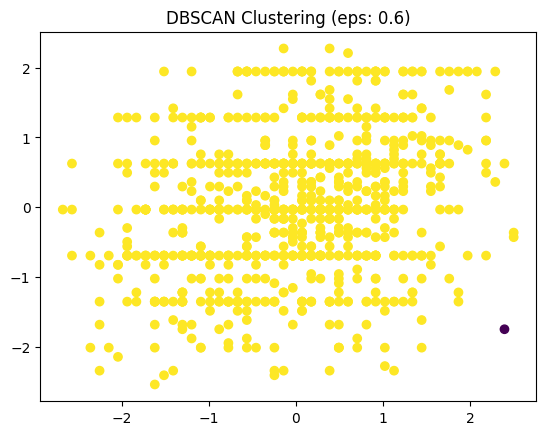

In [88]:
plt.scatter(df_cluster[['Age', 'RestingBP']].to_numpy()[:, 0], df_cluster[['Age', 'RestingBP']].to_numpy()[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering (eps: 0.2)')
plt.show()

plt.scatter(df_cluster[['Age', 'RestingBP']].to_numpy()[:, 0], df_cluster[['Age', 'RestingBP']].to_numpy()[:, 1], c=labels2, cmap='viridis')
plt.title('DBSCAN Clustering (eps: 0.4)')
plt.show()

plt.scatter(df_cluster[['Age', 'RestingBP']].to_numpy()[:, 0], df_cluster[['Age', 'RestingBP']].to_numpy()[:, 1], c=labels3, cmap='viridis')
plt.title('DBSCAN Clustering (eps: 0.6)')
plt.show()

In [17]:
"""
Здесь иерархическая кластеризация и метрики
"""

'\nЗдесь иерархическая кластеризация и метрики\n'

In [18]:
# your_code here

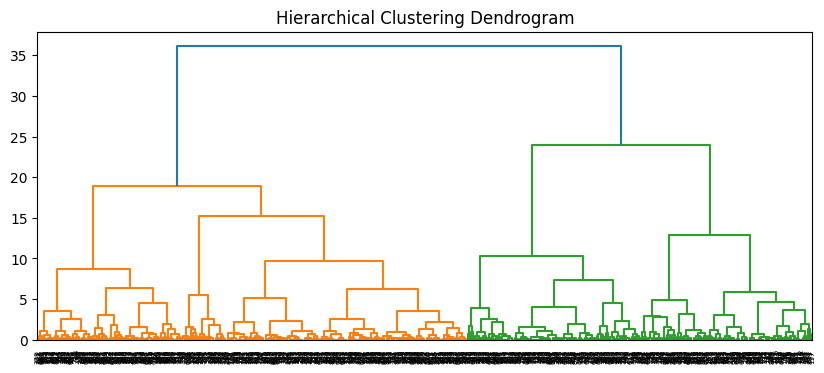

In [103]:
plt.figure(figsize=(10, 4))
linkage_matrix = hierarchy.linkage(df_cluster[['Age', 'RestingBP']], method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


#не совсем понял, что тут нужно

In [19]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров иерархической кластеризации\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

In [20]:
# your_code here

In [21]:
#!pip install ydata-profiling

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [22]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



'\nНа отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма\n\nfrom ydata_profiling import ProfileReport\n\nProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)\n\n'

In [23]:
# your_code here